# Credit Card Approval Prediction using a Classification Model

* Student name: Alec Hing
* Student pace: FLEX 
* Instructor name: Abhineet Kulkarni

## Business Problem

A credit card can be a useful tool in the daily lives of a consumer. It helps to build credit and trust for future loans one might take and allows someone to purchase something where they might not have direct cash on hand. It takes a responsible person to balance their budgets and know their spending limits.
In the case where someone cannot pay off their amount owed by their due date, it results in their credit score to be negatively effected. If this case happens too frequently, they will most likely be deemed an at risk applicant for future applications to banks. 
Not being able to pay off their bills can be due to numerous factors someone goes through in life, which get taken into account when an applicant applies for a credit card (age, years employment status, income, and credit history to name a few).
With all that being said, determining if a person is an at risk applicant can be hard with so many factors to consider.

## Business Value

Determine if an applicant for a credit card will be a safe or unsafe client using machine learning classification model.

# Obtaining Data and Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE, ADASYN
import seaborn as sns
plt.style.use('seaborn')
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

In [2]:
# Load csv files
application = pd.read_csv('data/application_record.csv')
record = pd.read_csv('data/credit_record.csv')

# Preview datasets
application.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Days_Birth = Birthday 
Count backwards from current day (0), -1 means yesterday.

Days_Employed = Start date of employment
Count backwards from current day(0). If positive, it means the person currently unemployed.

In [3]:
# Preview datasets
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


 The same ID gets added into record dataset for every month the account has been in active.

Month_balance = Record month 
The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on.

Status: 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [4]:
#Finding out more info about datasets
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


# Scrubbing and Cleaning Data

In [6]:
# Cheacking for NaNs
application.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
# Checking for NaNs
record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

## Checking for Duplicates

In [8]:
print(f'Duplicates in application df: {application.iloc[:,1:].duplicated().sum()}, ({np.round(100*application.iloc[:,1:].duplicated().sum()/len(application),1)}%)')
print('')
print(f'Duplicates in record df: {record.duplicated().sum()}, ({np.round(100*record.duplicated().sum()/len(record),1)}%)')

Duplicates in application df: 348472, (79.5%)

Duplicates in record df: 0, (0.0%)


In [9]:
application.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

Flag Mobil seems to be constant. 
Code_gender, flag_own_car, flag_own_reality, flag_work_phone, flag_phone, and flag_email are binary. 

In [10]:
record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

## Cleaning Data

In [11]:
# Looking more into Occupation_Type
application['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [12]:
application['OCCUPATION_TYPE'].describe()

count       304354
unique          18
top       Laborers
freq         78240
Name: OCCUPATION_TYPE, dtype: object

In [13]:
application['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

### Dropping Duplicates

In [14]:
# Drop duplicates
application = application.drop_duplicates(subset=application.columns[1:], keep='first')

In [15]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90085 entries, 0 to 438553
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   90085 non-null  int64  
 1   CODE_GENDER          90085 non-null  object 
 2   FLAG_OWN_CAR         90085 non-null  object 
 3   FLAG_OWN_REALTY      90085 non-null  object 
 4   CNT_CHILDREN         90085 non-null  int64  
 5   AMT_INCOME_TOTAL     90085 non-null  float64
 6   NAME_INCOME_TYPE     90085 non-null  object 
 7   NAME_EDUCATION_TYPE  90085 non-null  object 
 8   NAME_FAMILY_STATUS   90085 non-null  object 
 9   NAME_HOUSING_TYPE    90085 non-null  object 
 10  DAYS_BIRTH           90085 non-null  int64  
 11  DAYS_EMPLOYED        90085 non-null  int64  
 12  FLAG_MOBIL           90085 non-null  int64  
 13  FLAG_WORK_PHONE      90085 non-null  int64  
 14  FLAG_PHONE           90085 non-null  int64  
 15  FLAG_EMAIL           90085 non-null

After dropping duplicates, number of rows dropped from 438557 entries to  90085 entries.

In [16]:
print(f'Duplicates in application df: {application.iloc[:,1:].duplicated().sum()}, ({np.round(100*application.iloc[:,1:].duplicated().sum()/len(application),1)}%)')

Duplicates in application df: 0, (0.0%)


### Removing NaNs

In [17]:
# Replace NaNs from Occupation type with Other
application['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

In [18]:
# Check to see that NaNs are gone
application.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

### Remove Constant Value

In [19]:
# Remove the only constant value because it will not help the model
application.drop('FLAG_MOBIL', axis=1, inplace=True)

In [20]:
# Check that flag_mobil is removed
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90085 entries, 0 to 438553
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   90085 non-null  int64  
 1   CODE_GENDER          90085 non-null  object 
 2   FLAG_OWN_CAR         90085 non-null  object 
 3   FLAG_OWN_REALTY      90085 non-null  object 
 4   CNT_CHILDREN         90085 non-null  int64  
 5   AMT_INCOME_TOTAL     90085 non-null  float64
 6   NAME_INCOME_TYPE     90085 non-null  object 
 7   NAME_EDUCATION_TYPE  90085 non-null  object 
 8   NAME_FAMILY_STATUS   90085 non-null  object 
 9   NAME_HOUSING_TYPE    90085 non-null  object 
 10  DAYS_BIRTH           90085 non-null  int64  
 11  DAYS_EMPLOYED        90085 non-null  int64  
 12  FLAG_WORK_PHONE      90085 non-null  int64  
 13  FLAG_PHONE           90085 non-null  int64  
 14  FLAG_EMAIL           90085 non-null  int64  
 15  OCCUPATION_TYPE      90085 non-null

## Creating a target variable

Due to both datasets being used in this model not sharing a mutual target variable, one must be created. Target variable will determine whether someone is a person who pays their bills/has no bills for that month or has a bill for 30 days or more.

Reminder that -
Status: 0: 1-29 days past due. 
1: 30-59 days past due.
2: 60-89 days overdue. 
3: 90-119 days overdue. 
4: 120-149 days overdue. 
5: Overdue or bad debts, write-offs for more than 150 days. 
C: paid off that month. 
X: No loan for the month.

In [21]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [22]:
# The same ID gets added into record dataset for every month the account has been 
# in active

In [23]:
record['target'] = record['STATUS']
record['target'].replace('X', 0, inplace = True)
record['target'].replace('C', 0, inplace = True)
record['target'] = record['target'].astype(int)

# Anything in the target column that is greater than or equal to 1 will be 
# set as 1 to indicate that person has not paid bills in 30 days or more.
record.loc[record['target']>=1, 'target'] = 1

# Select just the ID and target columns and group by ID

#record_target = pd.DataFrame(record.groupby(['ID'])['target'].agg(max)).reset_index()


In [24]:
record_target = record.loc[:,['ID','target']]
#record_target = record.loc[(record.columns=='ID') & record.columns=='target']
record_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   ID      1048575 non-null  int64
 1   target  1048575 non-null  int64
dtypes: int64(2)
memory usage: 16.0 MB


In [25]:
record_target.head()

,ID,target
0,5001711,0
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0


In [26]:
# Combine this df with the application df
main_df = pd.merge(application, record_target, how='inner', on= ['ID'])
#main_df.head()
main_df.shape

(219173, 18)

## Determine how old an account is

In [27]:
# How many months an account has been open for
month_df = pd.DataFrame(record.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

#Renaming month_balance column
month_df.rename(columns = {'MONTHS_BALANCE': 'ACCOUNT_AGE'}, inplace=True)

# Make month values positive
month_df['ACCOUNT_AGE'] = -month_df['ACCOUNT_AGE']

# Merge df matching ID
main_df = pd.merge(main_df, month_df, how='inner', on=['ID'])

main_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,0,15
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,0,15
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,0,15
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,0,15
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,0,15


In [28]:
main_df.shape

(219173, 19)

## Cleaning continuous features
Reminder: Days_Birth = Count backwards from current day (0), -1 means yesterday.
Days_employed = Count backwards from current day(0). If positive, it means the person currently unemployed.

In [29]:
# Change days_birth to age and drop days_birth
main_df['AGE']= -main_df['DAYS_BIRTH']/365.25
main_df.drop('DAYS_BIRTH', axis=1, inplace=True)

# Determine those unemployed and set value to 1
main_df['UNEMPLOYED'] = 0
main_df.loc[-main_df['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1

# Show how long someone has been employed 
main_df['YEARS_EMPLOYED'] = -main_df['DAYS_EMPLOYED']/365.25
main_df.loc[main_df['YEARS_EMPLOYED'] < 0, 'YEARS_EMPLOYED'] = 0
main_df.drop('DAYS_EMPLOYED', axis=1, inplace= True)
main_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_AGE,AGE,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,0,15,32.867899,0,12.435318
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,0,15,32.867899,0,12.435318
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,0,15,32.867899,0,12.435318
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,0,15,32.867899,0,12.435318
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,0,15,32.867899,0,12.435318


In [30]:
#main_df.loc[main_df['UNEMPLOYED'] == 1]

## Changing categorical features to 0's and 1's

In [31]:
# Checking values in the categorical features

#main_df['CODE_GENDER'].value_counts()
#main_df['FLAG_OWN_CAR'].value_counts()
#main_df['FLAG_OWN_REALTY'].value_counts()

In [32]:
# Gender
main_df['CODE_GENDER'] = main_df['CODE_GENDER'].replace(['F','M'],[0,1])

# Does the person own a car
main_df['FLAG_OWN_CAR'] = main_df['FLAG_OWN_CAR'].replace(['N','Y'],[0,1])

# Is there a property
main_df['FLAG_OWN_REALTY'] = main_df['FLAG_OWN_REALTY'].replace(['N','Y'],[0,1])

## Renaming Column Names

In [33]:
main_df = main_df.rename(columns={
    'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car',
    'FLAG_OWN_REALTY':'Own_property',
    'CNT_CHILDREN':'Num_children',
    'AMT_INCOME_TOTAL':'Total_income',
    'NAME_INCOME_TYPE':'Income_type',
    'NAME_EDUCATION_TYPE':'Education_type',
    'NAME_FAMILY_STATUS':'Family_status',
    'NAME_HOUSING_TYPE':'Housing_type',
    'FLAG_WORK_PHONE':'Work_phone',
    'FLAG_PHONE':'Phone',
    'FLAG_EMAIL':'Email',
    'OCCUPATION_TYPE':'Occupation_type',
    'CNT_FAM_MEMBERS':'Num_family',
    'target':'Target',
    'ACCOUNT_AGE':'Account_age',
    'AGE':'Age',
    'UNEMPLOYED':'Unemployed',
    'YEARS_EMPLOYED':'Years_employed'})
main_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_age,Age,Unemployed,Years_employed
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,0,15,32.867899,0,12.435318
1,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,0,15,32.867899,0,12.435318
2,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,0,15,32.867899,0,12.435318
3,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,0,15,32.867899,0,12.435318
4,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,0,15,32.867899,0,12.435318


In [34]:
# Change type float to integer
main_df['Num_family']= main_df['Num_family'].astype(int)

In [35]:
# Reorder columns
main_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_age', 'Age', 'Unemployed',
       'Years_employed'],
      dtype='object')

In [36]:
main_df= main_df[['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone',
               'Phone', 'Email', 'Unemployed', 'Num_children', 'Num_family', 
               'Account_age', 'Total_income', 'Age', 'Years_employed',  
               'Income_type', 'Education_type', 'Family_status',
               'Housing_type', 'Occupation_type','Target']]


In [37]:
# Dropping ID column because it is not needed anymore
main_df.drop('ID', axis=1, inplace=True)
main_df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_age,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.867899,12.435318,Working,Higher education,Civil marriage,Rented apartment,Other,0
1,1,1,1,1,0,0,0,0,2,15,427500.0,32.867899,12.435318,Working,Higher education,Civil marriage,Rented apartment,Other,0
2,1,1,1,1,0,0,0,0,2,15,427500.0,32.867899,12.435318,Working,Higher education,Civil marriage,Rented apartment,Other,0
3,1,1,1,1,0,0,0,0,2,15,427500.0,32.867899,12.435318,Working,Higher education,Civil marriage,Rented apartment,Other,0
4,1,1,1,1,0,0,0,0,2,15,427500.0,32.867899,12.435318,Working,Higher education,Civil marriage,Rented apartment,Other,0


In [38]:
# Find out current shape of df
print('Current df shape: ', main_df.shape)

Current df shape:  (219173, 19)


Shape of df's went from 2 datasets with a size of (438557,18) and (1048575, 3) to (36457, 20) before dropping duplicates.
After dropping duplicates the shape became: (9709, 19).

In [39]:
main_df.dtypes

Gender               int64
Own_car              int64
Own_property         int64
Work_phone           int64
Phone                int64
Email                int64
Unemployed           int64
Num_children         int64
Num_family           int64
Account_age          int64
Total_income       float64
Age                float64
Years_employed     float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Occupation_type     object
Target               int64
dtype: object

# Baseline Model - Single Decision Tree

## Create Dummy Variables for Categorical Variables

In [40]:
# Split outcome and predictor variables
target = main_df['Target']
credit_df = main_df.drop('Target', axis=1)

In [41]:
credit_df.dtypes

Gender               int64
Own_car              int64
Own_property         int64
Work_phone           int64
Phone                int64
Email                int64
Unemployed           int64
Num_children         int64
Num_family           int64
Account_age          int64
Total_income       float64
Age                float64
Years_employed     float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Occupation_type     object
dtype: object

In [42]:
categoricals = ['Income_type','Education_type', 'Family_status',
               'Housing_type', 'Occupation_type']

In [43]:
#cat_income = X_train[['Income_type']]
# instantiate OHE
#ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
#ohe.fit_transform(X_train[categoricals])
#ohe.categories_

In [44]:
#data = pd.get_dummies(credit_df)
#data.columns

## Data split 
Split between data and target 75/25 training and test sets with a random state of 123.

In [45]:
main_df.Target.value_counts()

0    215418
1      3755
Name: Target, dtype: int64

Creating an undersampled df due to low recall values in other models.

In [46]:
# add random state 123
data_undersample_0 = main_df[main_df['Target']==0].sample(n=1283, axis=0, random_state=123)
data_1 = main_df[main_df['Target']==1]
data_undersampled = pd.concat([data_undersample_0, data_1], axis=0)

In [47]:
data_undersampled = pd.get_dummies(data_undersampled)

In [48]:
data_undersampled.Target.value_counts()

1    3755
0    1283
Name: Target, dtype: int64

In [55]:
# Split undersampled data
X_undersampled = data_undersampled.drop(columns = ['Target'])
y_undersampled = data_undersampled.Target
data_train_undersampled, data_test_undersampled, target_train_undersampled, target_test_undersampled =train_test_split(X_undersampled, y_undersampled,test_size = 0.25, random_state=123)


Data went from over 10,000 to about 2600.

In [49]:
data_train, data_test, target_train, target_test = train_test_split(credit_df, target, 
                                                                    test_size = 0.25, random_state=123)


In [50]:
#cat_income = X_train[['Income_type']]
# instantiate OHE
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe_train = ohe.fit_transform(data_train[categoricals])
#data_train[categoricals].shape
data_train[categoricals].shape

(164379, 5)

In [51]:
ohe_train.shape

(164379, 40)

In [52]:
# Create transformed dataframe
ohe_train = pd.DataFrame(
    ohe_train,
    columns=ohe.get_feature_names(), index=data_train.index
    
)
# Replace categorical data with encoded data
data_train.drop(categoricals, axis=1, inplace=True)
data_train = pd.concat([ohe_train, data_train], axis=1)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164379 entries, 180915 to 15725
Data columns (total 53 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   x0_Commercial associate           164379 non-null  float64
 1   x0_Pensioner                      164379 non-null  float64
 2   x0_State servant                  164379 non-null  float64
 3   x0_Student                        164379 non-null  float64
 4   x0_Working                        164379 non-null  float64
 5   x1_Academic degree                164379 non-null  float64
 6   x1_Higher education               164379 non-null  float64
 7   x1_Incomplete higher              164379 non-null  float64
 8   x1_Lower secondary                164379 non-null  float64
 9   x1_Secondary / secondary special  164379 non-null  float64
 10  x2_Civil marriage                 164379 non-null  float64
 11  x2_Married                        164379 non-nul

In [54]:
# Use test 

# Create transformed dataframe
ohe_test = ohe.transform(data_test[categoricals])
# Create transformed dataframe
ohe_test = pd.DataFrame(
    ohe_test,
    columns=ohe.get_feature_names(), index=data_test.index
    
)
# Replace categorical data with encoded data
data_test.drop(categoricals, axis=1, inplace=True)
data_test = pd.concat([ohe_test, data_test], axis=1)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Building regular tree as baseline

In [56]:
# Instantiating and fitting a DecisionTreeClassifier
# removed parameters here
# get predictions for training 
tree_clf = DecisionTreeClassifier(random_state =123) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(random_state=123)

In [57]:
# Examining how important each feature ends up being
# Feature importance
tree_clf.feature_importances_

array([5.55476752e-03, 7.92554925e-03, 3.75635444e-03, 1.08262334e-04,
       9.01005310e-03, 1.77543708e-04, 7.29025057e-03, 6.71309548e-03,
       2.06335103e-02, 1.33142529e-02, 3.63280399e-03, 7.63334278e-03,
       5.02833051e-03, 2.39810909e-02, 1.13400396e-02, 8.31078883e-05,
       4.31627924e-03, 4.06179163e-03, 1.26288466e-03, 2.08443149e-03,
       5.52261345e-03, 1.80107303e-03, 3.93768501e-03, 3.53427276e-03,
       8.30996863e-03, 4.99323382e-03, 4.77576453e-05, 6.97708290e-03,
       3.04101274e-04, 9.59815563e-03, 3.73701680e-03, 3.39583492e-03,
       2.26527617e-03, 1.09959387e-02, 1.24323073e-03, 2.78137872e-04,
       3.66801387e-03, 1.19757377e-03, 2.14258819e-03, 4.26898871e-03,
       3.57552516e-02, 3.00275791e-02, 3.03499347e-02, 1.15528109e-02,
       3.87769957e-02, 6.53168579e-03, 3.21193993e-03, 9.63617612e-03,
       1.63376916e-02, 7.62294570e-02, 1.05222211e-01, 2.36321401e-01,
       1.83920580e-01])

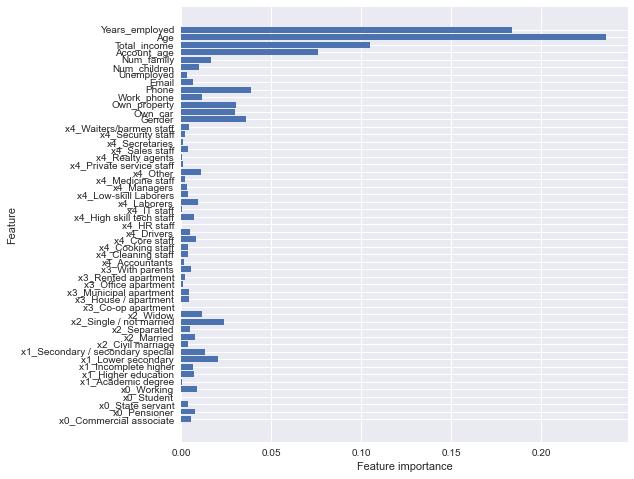

In [58]:
# Visualizing feature importance 
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

## Model Performance
Seeing how well the model performs on test data with a confusion matrix and classification_report.

In [59]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))

print(classification_report(target_test, pred))

[[53760    90]
 [  795   149]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     53850
           1       0.62      0.16      0.25       944

    accuracy                           0.98     54794
   macro avg       0.80      0.58      0.62     54794
weighted avg       0.98      0.98      0.98     54794



In [60]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(target_test,pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,53760,90,53850
1,795,149,944
All,54555,239,54794


Class imbalance causing low Recall percentage.
If SMOTE data changes from 0.18 to ~.3 or above, use SMOTE data throughout all models. Here there were 266 False Negatives.

### Dealing with Class Imbalance with SMOTE

In [61]:
# Deal with class imbalance using SMOTE which is only done on training set not on test.
# Finding class imbalance in the training and test sets:
# Training set
print(target_train.value_counts())
print('\n')
# Test set
print(target_test.value_counts())

0    161568
1      2811
Name: Target, dtype: int64


0    53850
1      944
Name: Target, dtype: int64


In [62]:
# SMOTE

# Previous original class distribution
print(target_train.value_counts())

# Fit SMOTE to training data
X_train_resampled, target_train_resampled = SMOTE().fit_resample(data_train, target_train) 


# Preview synthetic sample class distribution
print('\n')
print(pd.Series(target_train_resampled).value_counts()) 

0    161568
1      2811
Name: Target, dtype: int64


1    161568
0    161568
Name: Target, dtype: int64


In [63]:
tree_smote = DecisionTreeClassifier() 
tree_smote.fit(X_train_resampled, target_train_resampled)

DecisionTreeClassifier()

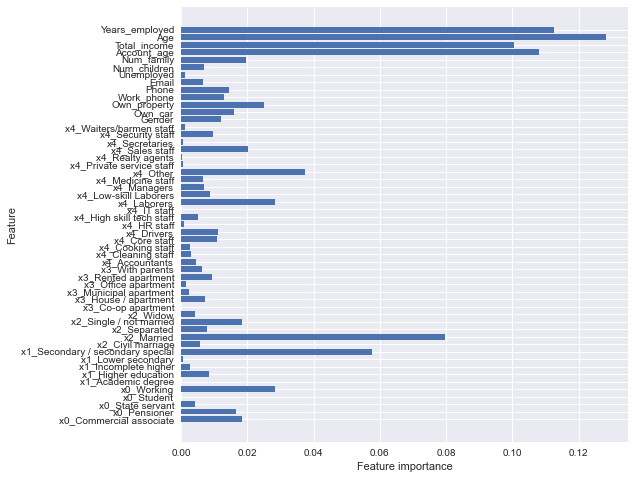

In [64]:
# Plot feature importance again
plot_feature_importances(tree_smote)

In [65]:
# Test set predictions
pred_smote = tree_smote.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred_smote))

print(classification_report(target_test, pred_smote))

[[51152  2698]
 [  357   587]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     53850
           1       0.18      0.62      0.28       944

    accuracy                           0.94     54794
   macro avg       0.59      0.79      0.62     54794
weighted avg       0.98      0.94      0.96     54794



Recall improved a bit here from 0.18 to 0.22. There are also less False Negatives with 253. 

### Predictive Performance 

In [66]:
# Calculate accuracy 
acc = accuracy_score(target_test,pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(target_test,pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :98.38485965616674

AUC is :0.58

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,53760,90,53850
1,795,149,944
All,54555,239,54794


In [67]:
# 0 and 0 means people who dont have debt and model predicted correctly - true negatives
# 1 and 1 people who have debt and model predicted correctly true positives
# true being 0 and predicted being 1 means false postives. did not have debt but model predicted they did
# true being 1 and predicted being 0 is false negative. had debt but model predicted they did not
# # false negative is extremely bad. want to lower false negatives as much as posible

# Grid Search CV

Cross Validation Score with a 3-fold cross validation on the training data

In [68]:
# Cross Validation Score with a 3-fold cross validation on the training data

tree_cv_score = cross_val_score(tree_clf, data_train, target_train, cv=3)
mean_tree_cv_score = np.mean(tree_cv_score)

print(f"Mean Cross Validation Score: {mean_tree_cv_score :.2%}")

Mean Cross Validation Score: 98.35%


The baseline model did pretty decent at almost 76% which is better than random guessing.

In [69]:
# Determine grid parameters 
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [70]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


In [71]:
# Instantiate GridSearchCV
tree_grid_search = GridSearchCV(tree_clf, tree_param_grid, cv=3, return_train_score=True)

# Fit to the data 

tree_grid_search.fit(data_train, target_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

Examining the best parameters

In [72]:
# Data used here is from baseline model
# Mean training score
tree_gs_training_score = np.mean(tree_grid_search.cv_results_['mean_train_score'])

# Mean test score
tree_gs_testing_score = tree_grid_search.score(data_test, target_test)

print(f"Mean Training Score: {tree_gs_training_score :.2%}")
print(f"Mean Test Score: {tree_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
tree_grid_search.best_params_

Mean Training Score: 98.40%
Mean Test Score: 98.40%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [73]:
# Test set predictions
pred2 = tree_grid_search.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred2))

print(classification_report(target_test, pred2))

[[53779    71]
 [  808   136]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     53850
           1       0.66      0.14      0.24       944

    accuracy                           0.98     54794
   macro avg       0.82      0.57      0.61     54794
weighted avg       0.98      0.98      0.98     54794



In [74]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(target_test,pred2, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,53779,71,53850
1,808,136,944
All,54587,207,54794


# Random Forests

## Baseline data using Random Forests

Number of estimators set to 100 and max depth set to 10.

In [75]:
# Instantiate and fit RandomForestClassifier
# added class weight equals balanced
forest = RandomForestClassifier(n_estimators=100, max_depth= 10, class_weight= 'balanced')
forest.fit(data_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=10)

In [76]:
# Training accuracy score 0.89781
forest.score(data_train, target_train)

0.9090638098540568

In [77]:
# Test accuracy score 0.7660626
forest.score(data_test, target_test)


0.9041500894258495

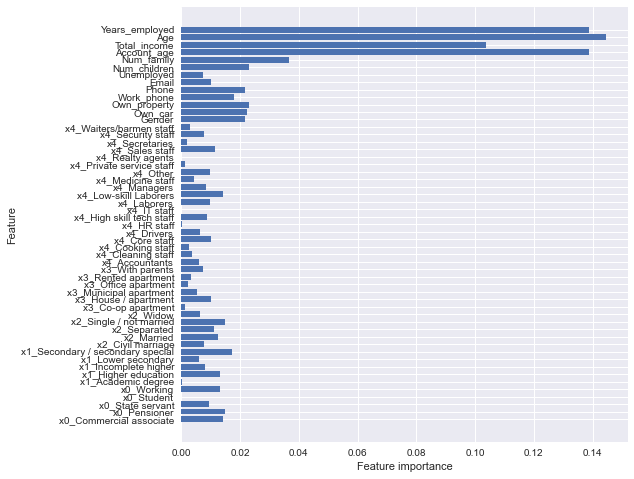

In [78]:
plot_feature_importances(forest)

In [79]:
# Test set predictions
pred3 = forest.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred3))

print(classification_report(target_test, pred3))

[[48976  4874]
 [  378   566]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     53850
           1       0.10      0.60      0.18       944

    accuracy                           0.90     54794
   macro avg       0.55      0.75      0.56     54794
weighted avg       0.98      0.90      0.94     54794



In [80]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(target_test,pred3, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,48976,4874,53850
1,378,566,944
All,49354,5440,54794


## Using Undersampled data with a Random Forest model

Tried numerous attempts to increase recall value but to no avail. By using undersampling, this improved this value quite a bit. The downside is that a lot of data was lost in the process.

In [81]:
forest_undersampled = RandomForestClassifier()
forest_undersampled.fit(data_train_undersampled, target_train_undersampled)

RandomForestClassifier()

In [82]:
pred_under = forest_undersampled.predict(data_test_undersampled)

# Confusion matrix and classification report
print(confusion_matrix(target_test_undersampled, pred_under))

print(classification_report(target_test_undersampled, pred_under))

[[110 200]
 [ 62 888]]
              precision    recall  f1-score   support

           0       0.64      0.35      0.46       310
           1       0.82      0.93      0.87       950

    accuracy                           0.79      1260
   macro avg       0.73      0.64      0.66      1260
weighted avg       0.77      0.79      0.77      1260



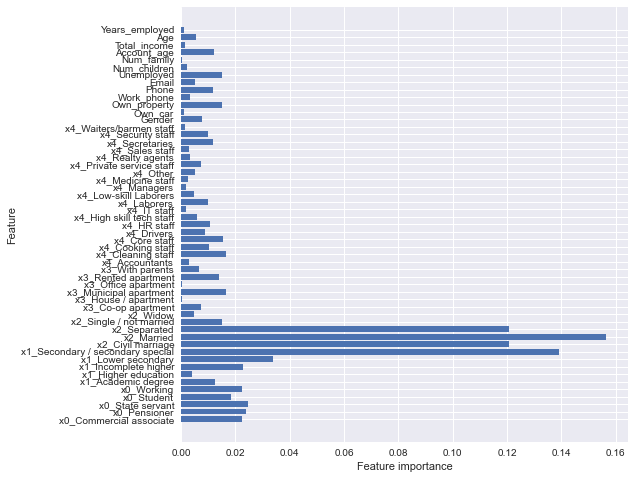

In [83]:
plot_feature_importances(forest_undersampled)

Recall is 0.55 meaning out of everyone that actually owed money, the model predicted 55% of them correctly.

In [84]:
# Instantiate GridSearchCV
under_grid_search = GridSearchCV(tree_clf, tree_param_grid, cv=3, return_train_score=True)

# Fit to the data 
under_grid_search.fit(data_train_undersampled, target_train_undersampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [85]:
print("Best Parameter Combination Found During Grid Search:")
tree_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [86]:
# Test set predictions
pred_under = under_grid_search.predict(data_test_undersampled)

# Confusion matrix and classification report
print(confusion_matrix(target_test_undersampled, pred_under))

print(classification_report(target_test_undersampled, pred_under))

[[161 149]
 [115 835]]
              precision    recall  f1-score   support

           0       0.58      0.52      0.55       310
           1       0.85      0.88      0.86       950

    accuracy                           0.79      1260
   macro avg       0.72      0.70      0.71      1260
weighted avg       0.78      0.79      0.79      1260



# XG Boost

In [87]:
from xgboost import XGBClassifier

In [88]:
# Instantiate XGBClassifier
# added class weight
# print classification reports
xg_clf = XGBClassifier(class_weight= 'balanced')

# Fit XGBClassifier
xg_clf.fit(data_train, target_train)

# Predict on training and test sets
training_preds = xg_clf.predict(data_train)
test_preds = xg_clf.predict(data_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(target_train, training_preds)
test_accuracy = accuracy_score(target_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
# 94.51
# 86.16

# recall was not very good but will be worked on in the future with more paramter tuning.

[22:55:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training Accuracy: 98.42%
Validation accuracy: 98.4%


In [89]:
# Test set predictions
pred4 = xg_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred4))

print(classification_report(target_test, pred4))

[[53796    54]
 [  825   119]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     53850
           1       0.69      0.13      0.21       944

    accuracy                           0.98     54794
   macro avg       0.84      0.56      0.60     54794
weighted avg       0.98      0.98      0.98     54794



In [90]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(target_test,pred4, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,53796,54,53850
1,825,119,944
All,54621,173,54794


Due to test accuracy being off from training accuracy, this suggest the model is beginning to overfit to the training data. Tunning the model could increase model performance and prevent overfitting.

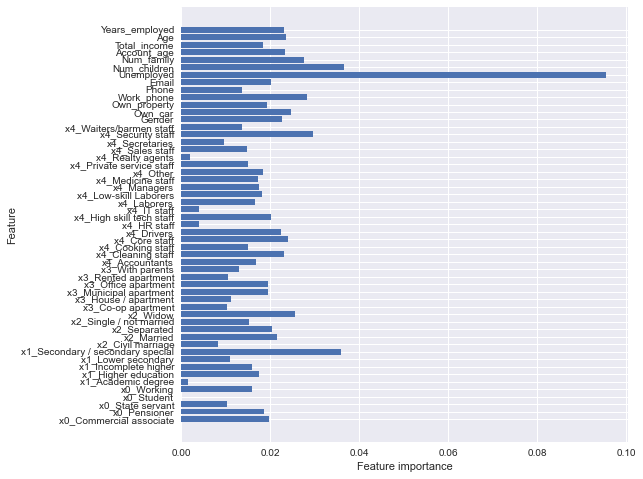

In [91]:
plot_feature_importances(xg_clf)

#### Tuning XGBoost

In [92]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [None, 15, 20, 30],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [93]:
grid_clf = GridSearchCV(xg_clf, param_grid, scoring='recall', cv=None, n_jobs=1)
grid_clf.fit(data_train, target_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(data_train)
test_preds = grid_clf.predict(data_test)
training_accuracy = accuracy_score(target_train, training_preds)
test_accuracy = accuracy_score(target_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[22:56:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:56:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:56:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in

[23:01:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:02:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:02:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in

[23:10:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:11:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:11:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in

[23:17:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:17:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:17:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in

In [94]:
# Test set predictions
pred5 = grid_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred5))

print(classification_report(target_test, pred5))

[[53760    90]
 [  795   149]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     53850
           1       0.62      0.16      0.25       944

    accuracy                           0.98     54794
   macro avg       0.80      0.58      0.62     54794
weighted avg       0.98      0.98      0.98     54794



In [95]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(target_test,pred5, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,53760,90,53850
1,795,149,944
All,54555,239,54794


# Conclusion/ Results

In the end the 2 best models ended up being the Random Forest model and the model using SMOTE data. Each had around a recall value of ~60% and an accuracy of over 90%. Meaning overall the model predicted 90% correctly and was able to detect at risk clients 60% of the time. Most of the data removal from the datasets came from removing duplicates, which is why the dataset reduced to about 100,000 which is still a significant amount of data.

Out of all the actual people that owed money, these 2 models predicted ~60% of them correctly which is way better than all the other models that had a recall under 20%. Therefore, due to these results I would recommend using the random forest or SMOTE model going forward. These model were able to get a high accuracy too which helps with identifying clients that can receive a credit card too. 

The major feature that had the greatest impact on this model was a person's age. Other features that had an impact on the model were: a person's total income, their account age, and the years a person was employed for.
